# Sliding window problems

### 1. [Smallest Subarray with a given sum](https://leetcode.com/problems/minimum-size-subarray-sum/)

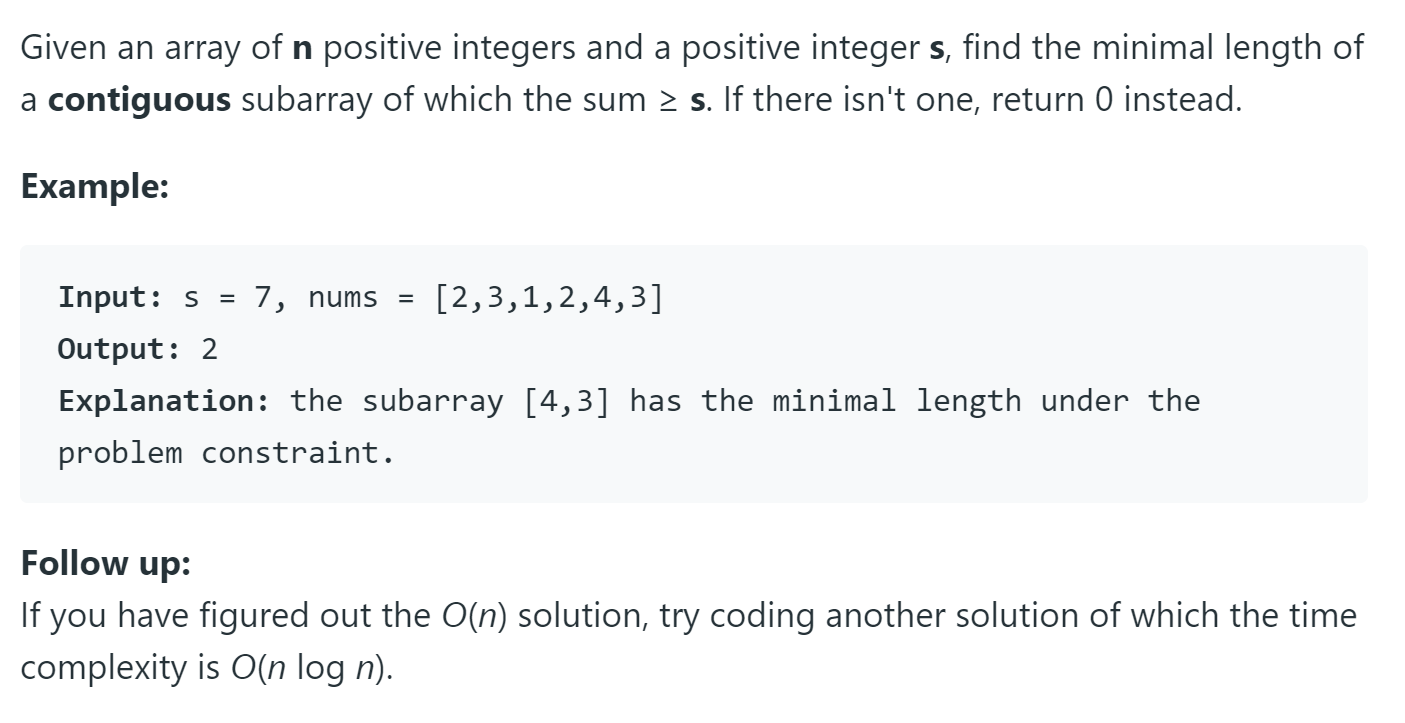

In [1]:
class Solution:
    def minSubArrayLen(self, s: int, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        start = 0
        arr_sum = 0
        min_size = float('inf')
        for end in range(len(nums)):
            arr_sum += nums[end]

            while arr_sum >= s:
                min_size = min(min_size, (end - start + 1))
                arr_sum -= nums[start]
                start += 1
        return min_size if min_size != float('inf') else 0

### [Minimum size subarray sum](https://leetcode.com/problems/minimum-size-subarray-sum/)

In [ ]:
class Solution:
    def minSubArrayLen(self, s: int, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        start = 0
        arr_sum = 0
        min_size = float('inf')
        for end in range(len(nums)):
            arr_sum += nums[end]

            while arr_sum >= s:
                min_size = min(min_size, (end-start+1))
                arr_sum -= nums[start] 
                start += 1
        return min_size if min_size != float('inf') else 0
            

### Maximum Sum Subarray of Size K

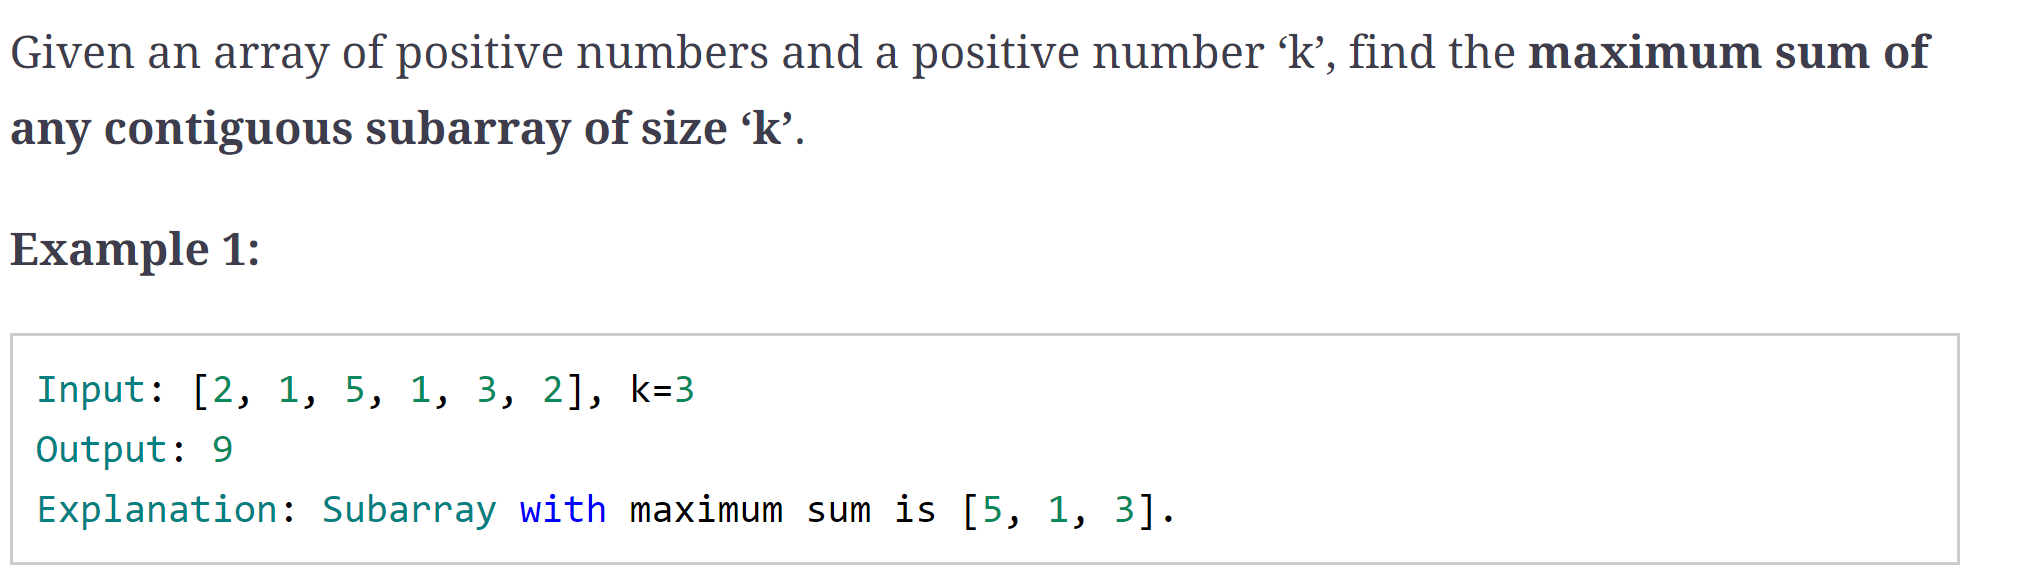

In [1]:
def max_sub_array_of_size_k(k, arr):
    max_sum, window_sum = 0, 0
    window_start = 0

    for window_end in range(len(arr)):
        window_sum += arr[window_end]  # add the next element
        # slide the window, we don't need to slide if we've not hit the required window size of 'k'
        if window_end >= k - 1:
            max_sum = max(max_sum, window_sum)
            window_sum -= arr[window_start]  # subtract the element going out
            window_start += 1  # slide the window ahead
    return max_sum


def main():
    print(("Maximum sum of a subarray of size K: " +
           str(max_sub_array_of_size_k(3, [2, 1, 5, 1, 3, 2]))))
    print(("Maximum sum of a subarray of size K: " +
           str(max_sub_array_of_size_k(2, [2, 3, 4, 1, 5]))))


main()

Maximum sum of a subarray of size K: 9
Maximum sum of a subarray of size K: 7


### Longest Substring with K Distinct Characters

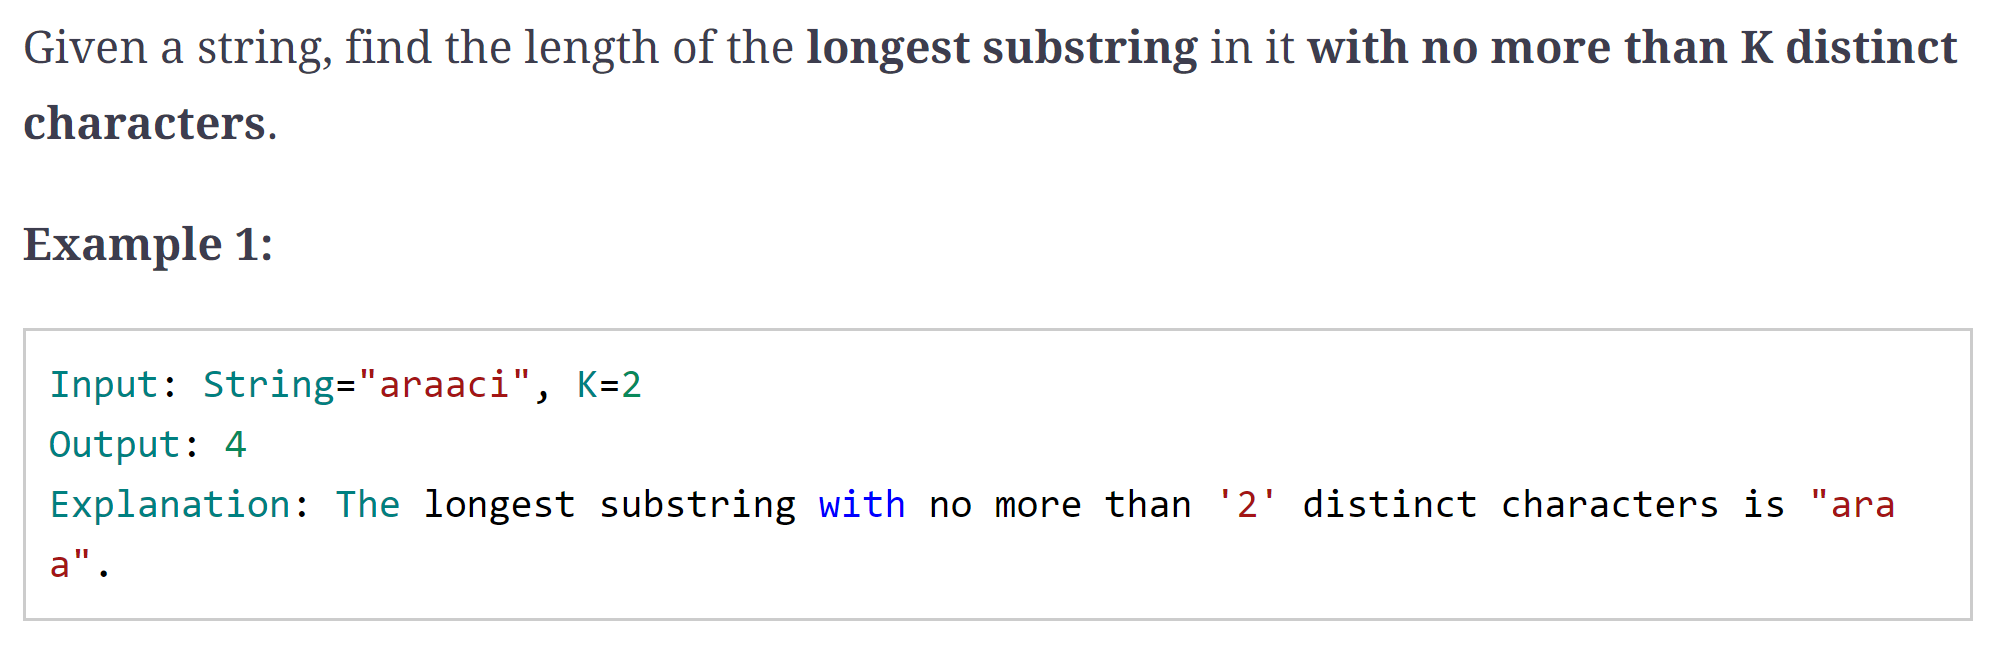

**Algorithm:**  
1. First, we will insert characters from the beginning of the string until we have ‘K’ distinct characters in the HashMap.
2. These characters will constitute our sliding window. We are asked to find the longest such window having no more than ‘K’ distinct characters. We will remember the length of this window as the longest window so far.
3. After this, we will keep adding one character in the sliding window (i.e. slide the window ahead), in a stepwise fashion.
4. In each step, we will try to shrink the window from the beginning if the count of distinct characters in the HashMap is larger than ‘K’. We will shrink the window until we have no more than ‘K’ distinct characters in the HashMap. This is needed as we intend to find the longest window.
5. While shrinking, we’ll decrement the frequency of the character going out of the window and remove it from the HashMap if its frequency becomes zero.
6. At the end of each step, we’ll check if the current window length is the longest so far, and if so, remember its length.

In [2]:
def longest_substring_with_k_distinct(str, k):
    window_start = 0
    max_length = 0
    char_frequency = {}

    # in the following loop we'll try to extend the range [window_start, window_end]
    for window_end in range(len(str)):
        right_char = str[window_end]
        if right_char not in char_frequency:
            char_frequency[right_char] = 0
        char_frequency[right_char] += 1

        # shrink the sliding window, until we are left with 'k' distinct characters in the char_frequency
        while len(char_frequency) > k:
            left_char = str[window_start]
            char_frequency[left_char] -= 1
            if char_frequency[left_char] == 0:
                del char_frequency[left_char]
            window_start += 1  # shrink the window
        # remember the maximum length so far
        max_length = max(max_length, window_end - window_start + 1)
    return max_length


def main():
    print(("Length of the longest substring: " +
           str(longest_substring_with_k_distinct("a", 1))))
    #print("Length of the longest substring: " + str(longest_substring_with_k_distinct("araaci", 1)))
    #print("Length of the longest substring: " + str(longest_substring_with_k_distinct("cbbebi", 3)))


main()

Length of the longest substring: 1


### [Longest Substring with at most K Distinct Characters](https://leetcode.com/problems/longest-substring-with-at-most-k-distinct-characters)

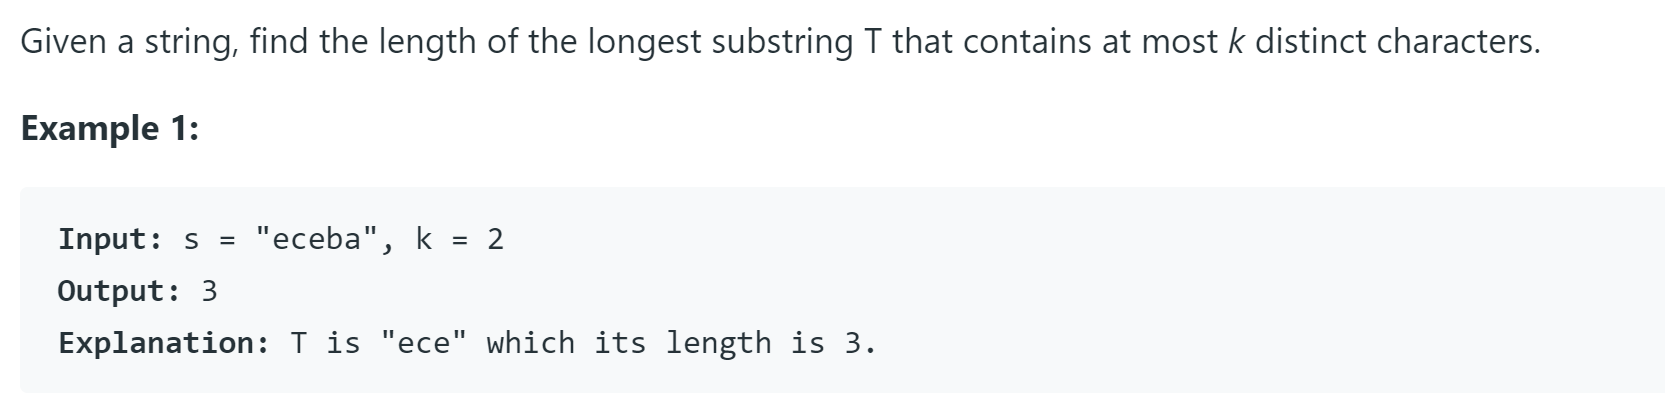

### [Fruit Into Baskets](https://leetcode.com/problems/fruit-into-baskets/)

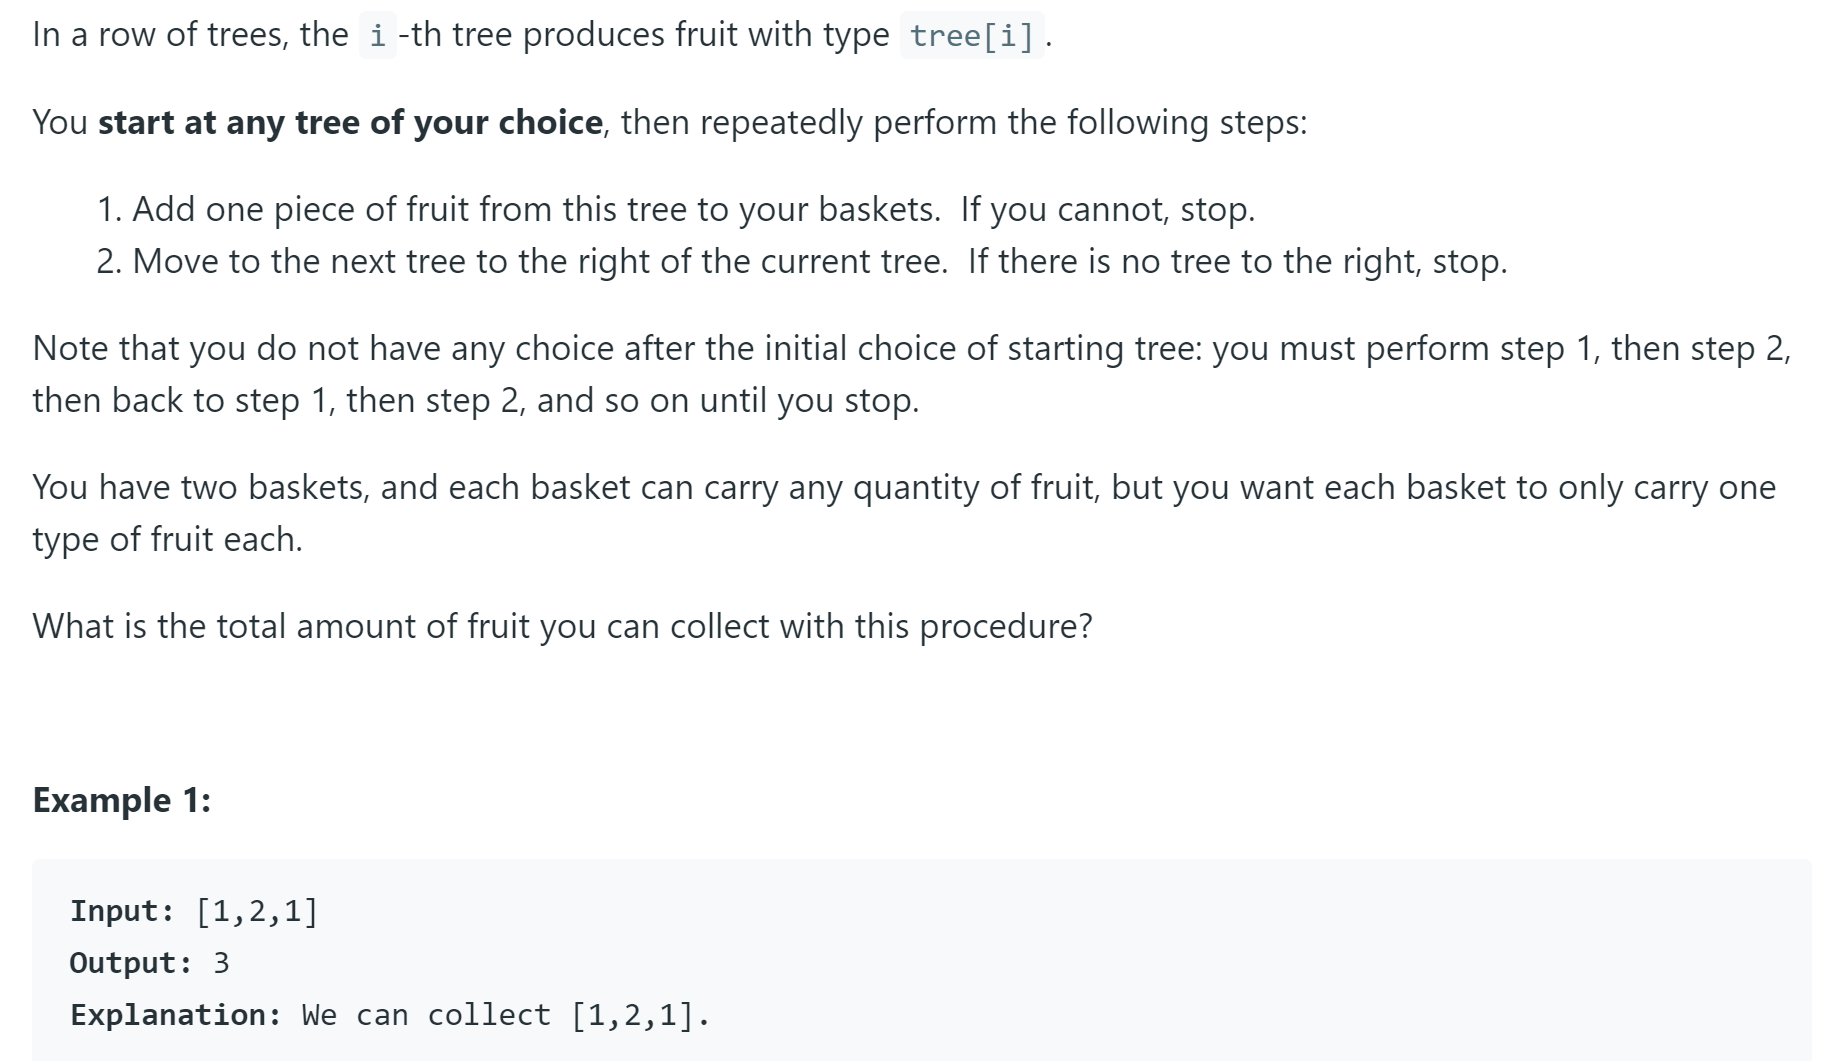

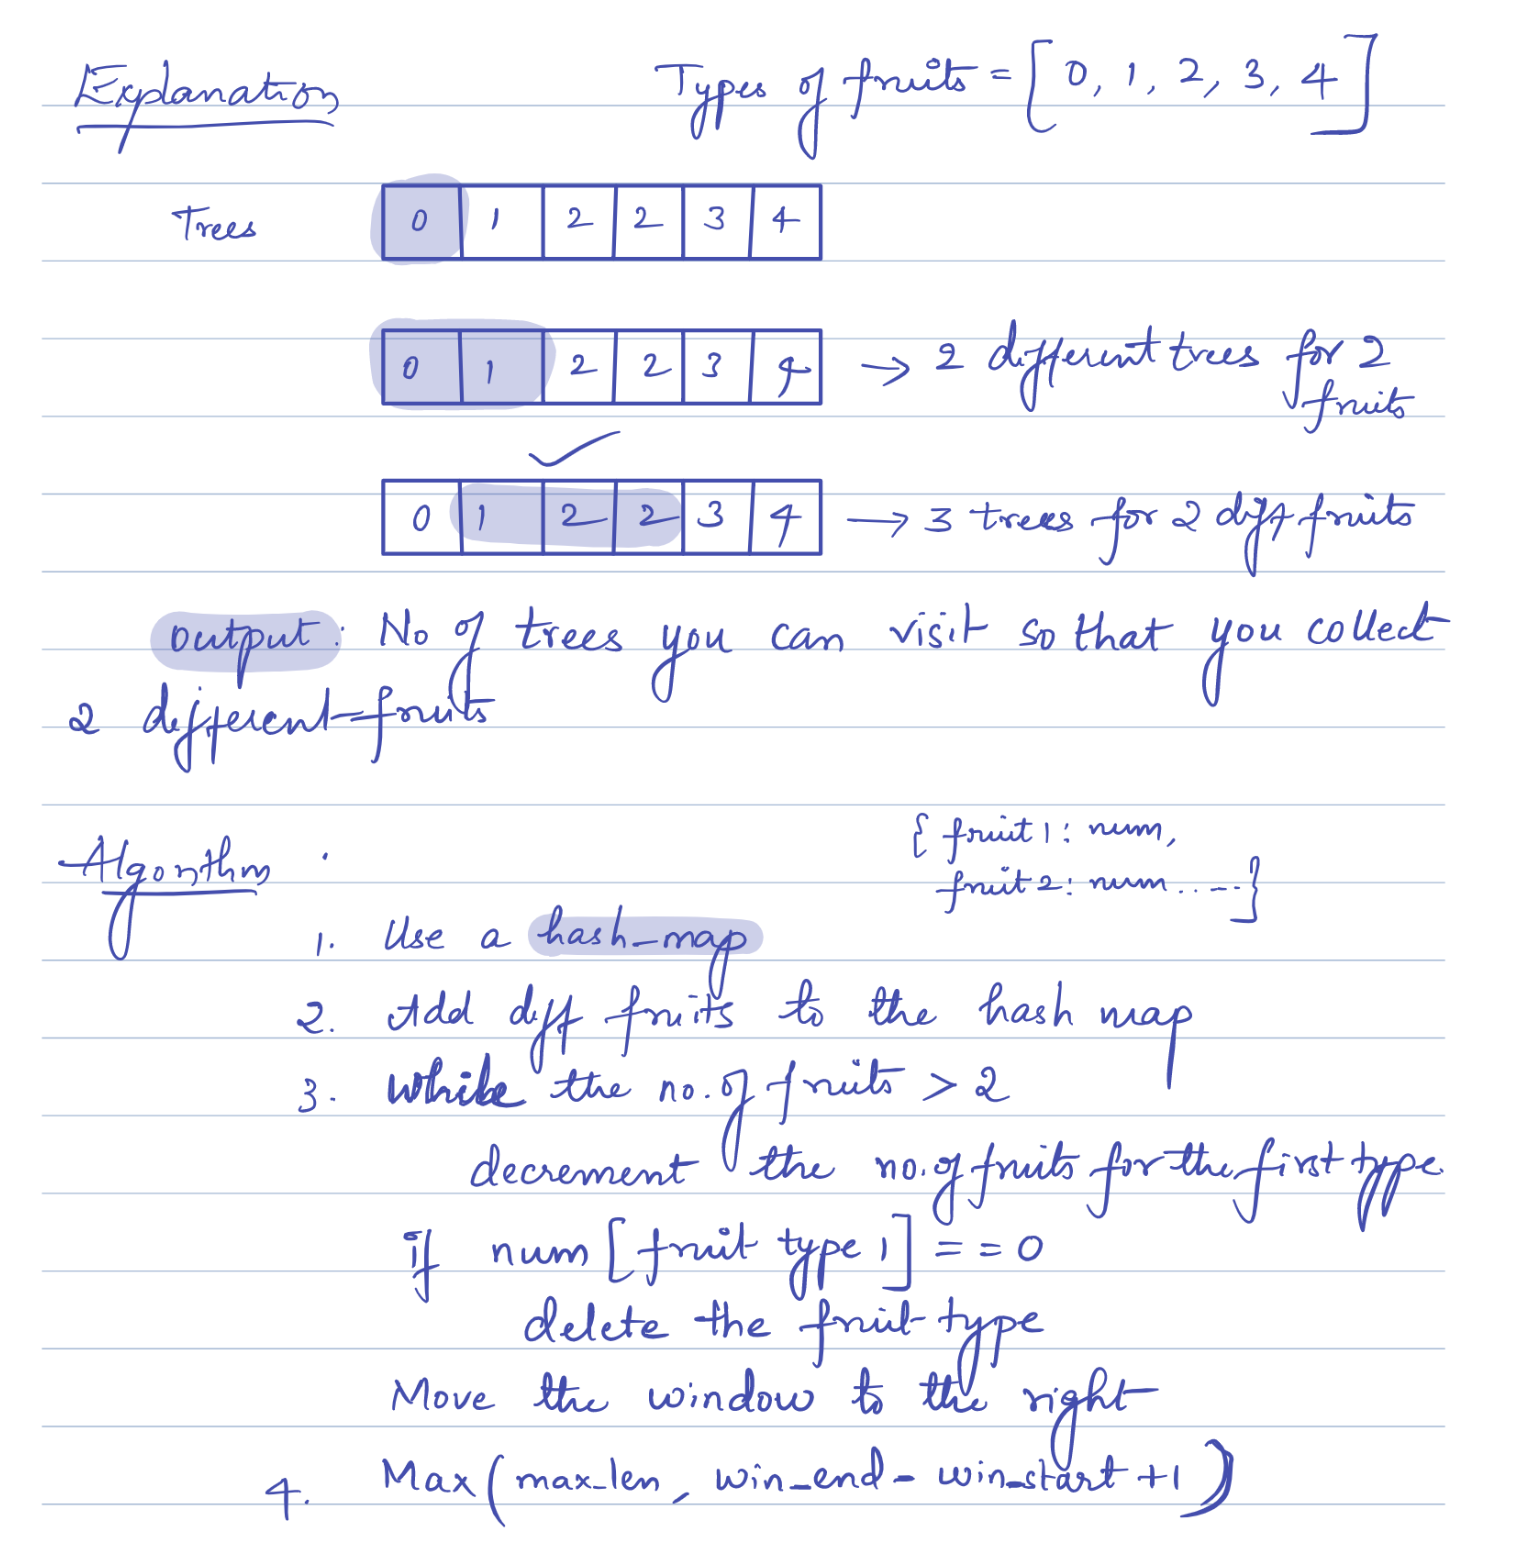

In [ ]:
'''
Approach: Sliding window and dictionary

Time complexity: O(N)
Space complexity: O(N)
'''


class Solution:
    def totalFruit(tree):
        window_start = 0
        max_window_len = 0
        hash_map = {}

        for window_end in range(len(tree)):
            # store the values in the dictionary
            if tree[window_end] not in hash_map:
                hash_map[tree[window_end]] = 1
            else:
                hash_map[tree[window_end]] += 1
            
            # When more than 2 types of fruits
            while len(hash_map) > 2:
                # Get the number of fruits of fruit type 1
                left_fruit = tree[window_start]
                # decrement the num
                hash_map[left_fruit] -= 1
                # if num of fruits is 0
                if hash_map[left_fruit] == 0:
                    del hash_map[left_fruit]
                # move the window to the right
                window_start += 1
            # find the max window size
            max_window_len = max(max_window_len, window_end - window_start + 1)
        return max_window_len

### [Longest Repeating Character Replacement](https://leetcode.com/problems/longest-repeating-character-replacement/)

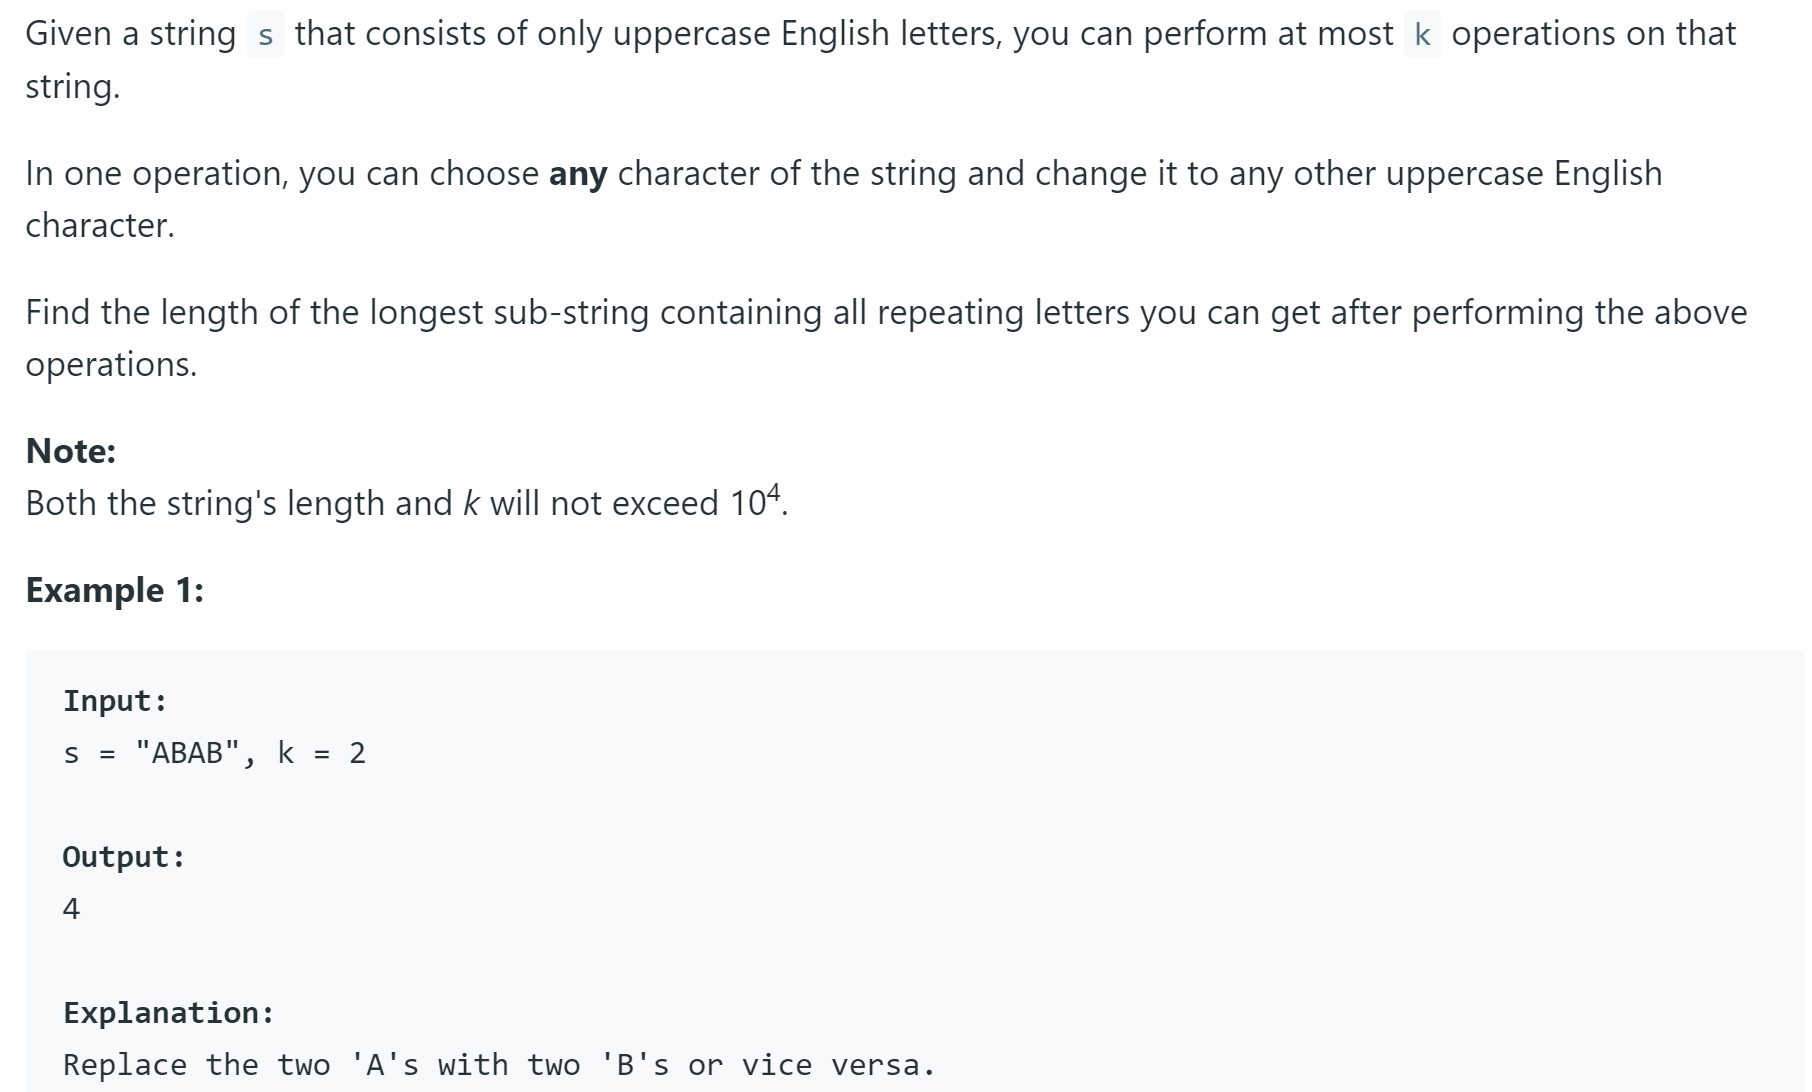

In [ ]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:

        window_start, max_length, max_repeat_letter_count = 0, 0, 0
        frequency_map = {}

        # Try to extend the range [window_start, window_end]
        for window_end in range(len(s)):
            right_char = s[window_end]
            if right_char not in frequency_map:
                frequency_map[right_char] = 0
            frequency_map[right_char] += 1
            max_repeat_letter_count = max(max_repeat_letter_count,
                                          frequency_map[right_char])

            # Current window size is from window_start to window_end, overall we have a letter which is
            # repeating 'max_repeat_letter_count' times, this means we can have a window which has one letter
            # repeating 'max_repeat_letter_count' times and the remaining letters we should replace.
            # if the remaining letters are more than 'k', it is the time to shrink the window as we
            # are not allowed to replace more than 'k' letters
            if (window_end - window_start + 1 - max_repeat_letter_count) > k:
                left_char = s[window_start]
                frequency_map[left_char] -= 1
                window_start += 1

            max_length = max(max_length, window_end - window_start + 1)
        return max_length

### [Longest Substring Without Repeating Characters](https://leetcode.com/problems/longest-substring-without-repeating-characters/)

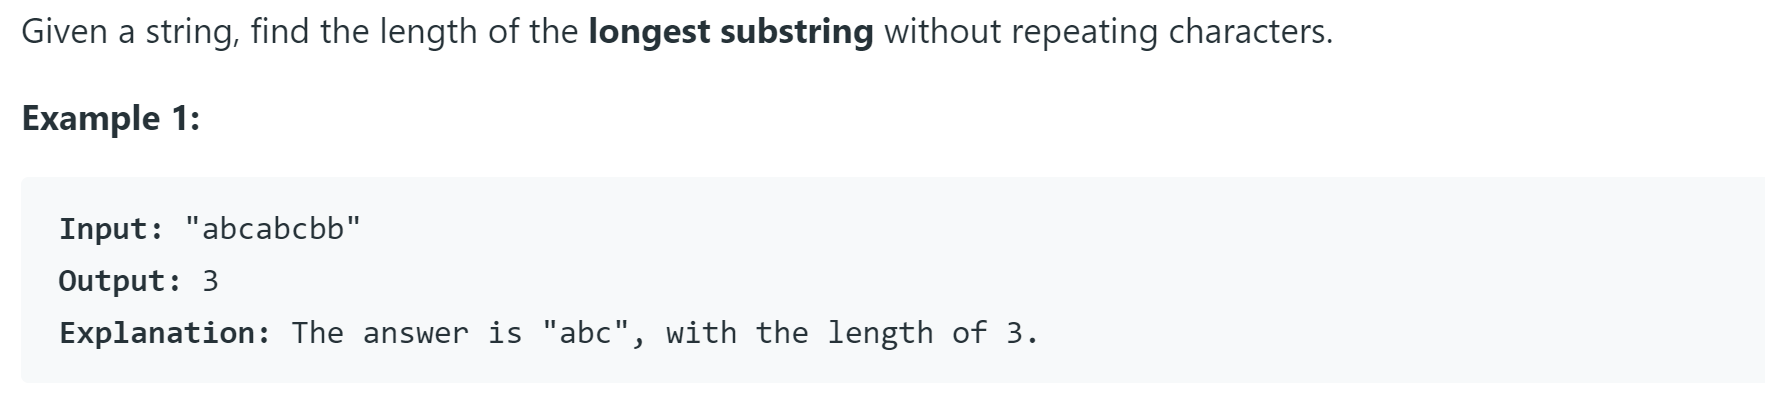

In [ ]:
'''
Time complexity: O(N)
Space complexity: O(k), k is number of unique characters
Algorithm:
1. Use a dictionary to store the position of the characters
2. If the dictionary contains a character shrink the window to +1 position from that character.
3. Find the max of max_length and window_length
'''


class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:

        # sliding window strategy

        # use dictionary to store the position of the characters appearing in the string
        window_start = 0
        max_length = 0
        dictionary = {}

        for window_end in range(len(s)):
            right_char = s[window_end]
            # sliding window shrinking condition
            if right_char in dictionary:
                window_start = max(window_start, dictionary[right_char] + 1)

            # if element not in dictionary
            dictionary[right_char] = window_end
            max_length = max(max_length, window_end - window_start + 1)

        return max_length

### [Max Consecutive Ones III](https://leetcode.com/problems/max-consecutive-ones-iii/)

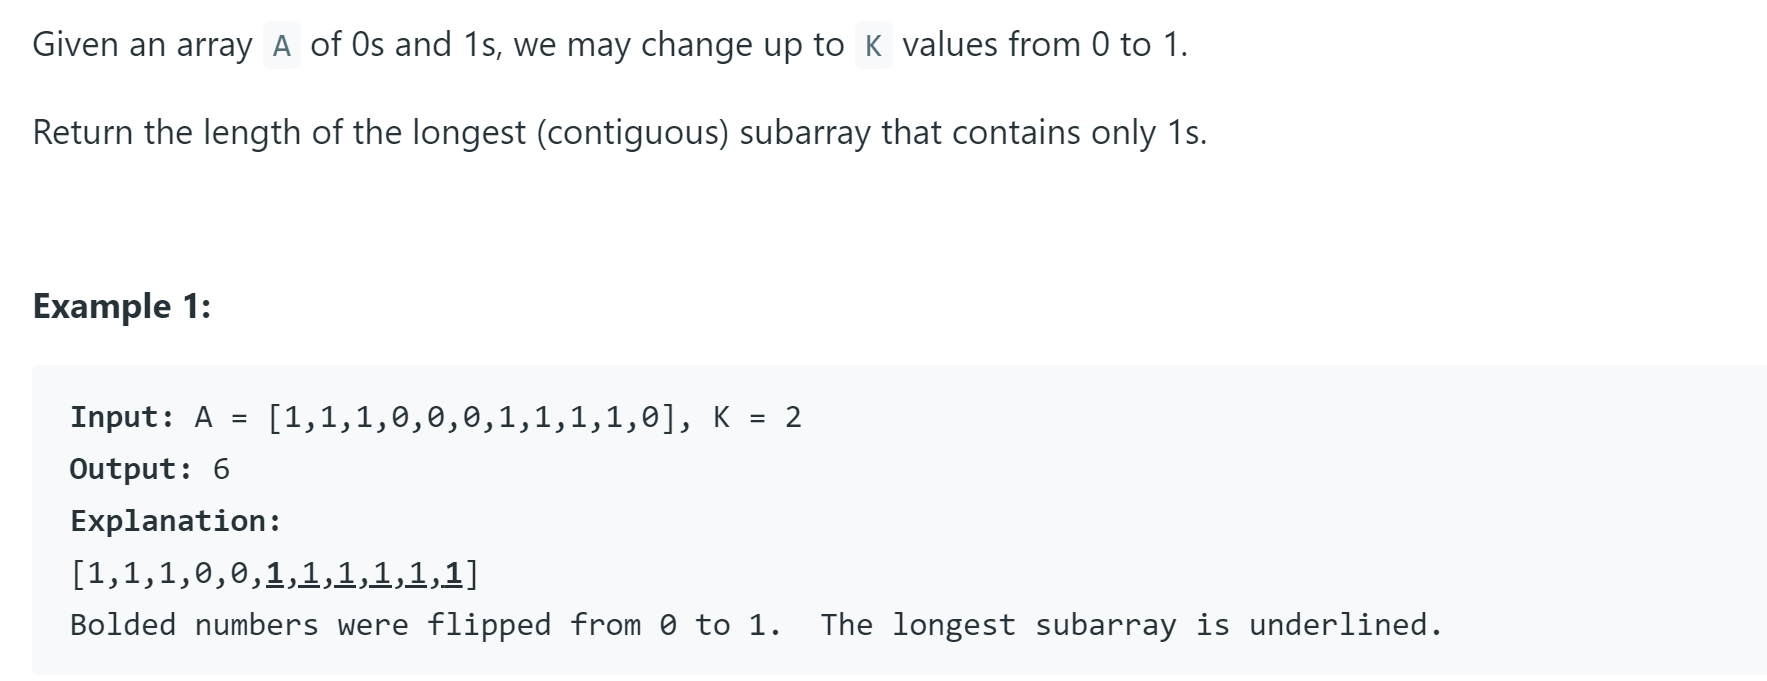

In [ ]:
class Solution:
    def longestOnes(self, A: List[int], K: int) -> int:

        window_start, max_length, max_ones_count = 0, 0, 0

        # Try to extend the range [window_start, window_end]
        for window_end in range(len(A)):
            if A[window_end] == 1:
                max_ones_count += 1

            # Current window size is from window_start to window_end, overall we have a maximum of 1s
            # repeating 'max_ones_count' times, this means we can have a window with 'max_ones_count' 1s
            # and the remaining are 0s which should replace with 1s.
            # now, if the remaining 1s are more than 'k', it is the time to shrink the window as we
            # are not allowed to replace more than 'k' 0s
            if (window_end - window_start + 1 - max_ones_count) > k:
                if A[window_start] == 1:
                    max_ones_count -= 1
                window_start += 1

            max_length = max(max_length, window_end - window_start + 1)
        return max_length

### [Group Anagrams](https://leetcode.com/problems/group-anagrams/)

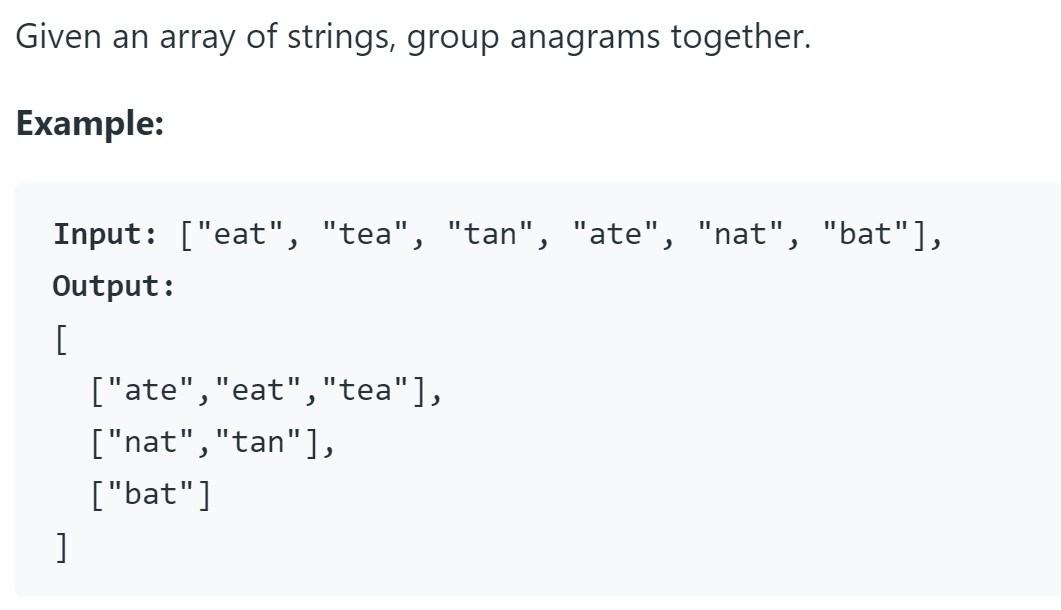

### [Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/)

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:

        window_start, matched, subs_start = 0, 0, 0
        min_length = len(s) + 1
        char_frequency = {}

        for chr in t:
            if chr not in char_frequency:
                char_frequency[chr] = 0
            char_frequency[chr] += 1

        # try to extend the range [window_start, window_end]
        for window_end in range(len(s)):
            right_char = s[window_end]
            if right_char in char_frequency:
                char_frequency[right_char] -= 1
                if char_frequency[
                        right_char] >= 0:  # Count every matching of a character
                    matched += 1

            # Shrink the window if we can, finish as soon as we remove a matched character
            while matched == len(t):
                if min_length > window_end - window_start + 1:
                    min_length = window_end - window_start + 1
                    subs_start = window_start

                left_char = s[window_start]
                window_start += 1
                if left_char in char_frequency:
                    # Note that we could have redundant matching characters, therefore we'll decrement the
                    # matched count only when a useful occurrence of a matched character is going out of the window
                    if char_frequency[left_char] == 0:
                        matched -= 1
                    char_frequency[left_char] += 1

        if min_length > len(s):
            return ""
        return s[subs_start:subs_start + min_length]

### [Sliding Window Maximum](https://leetcode.com/problems/sliding-window-maximum/)

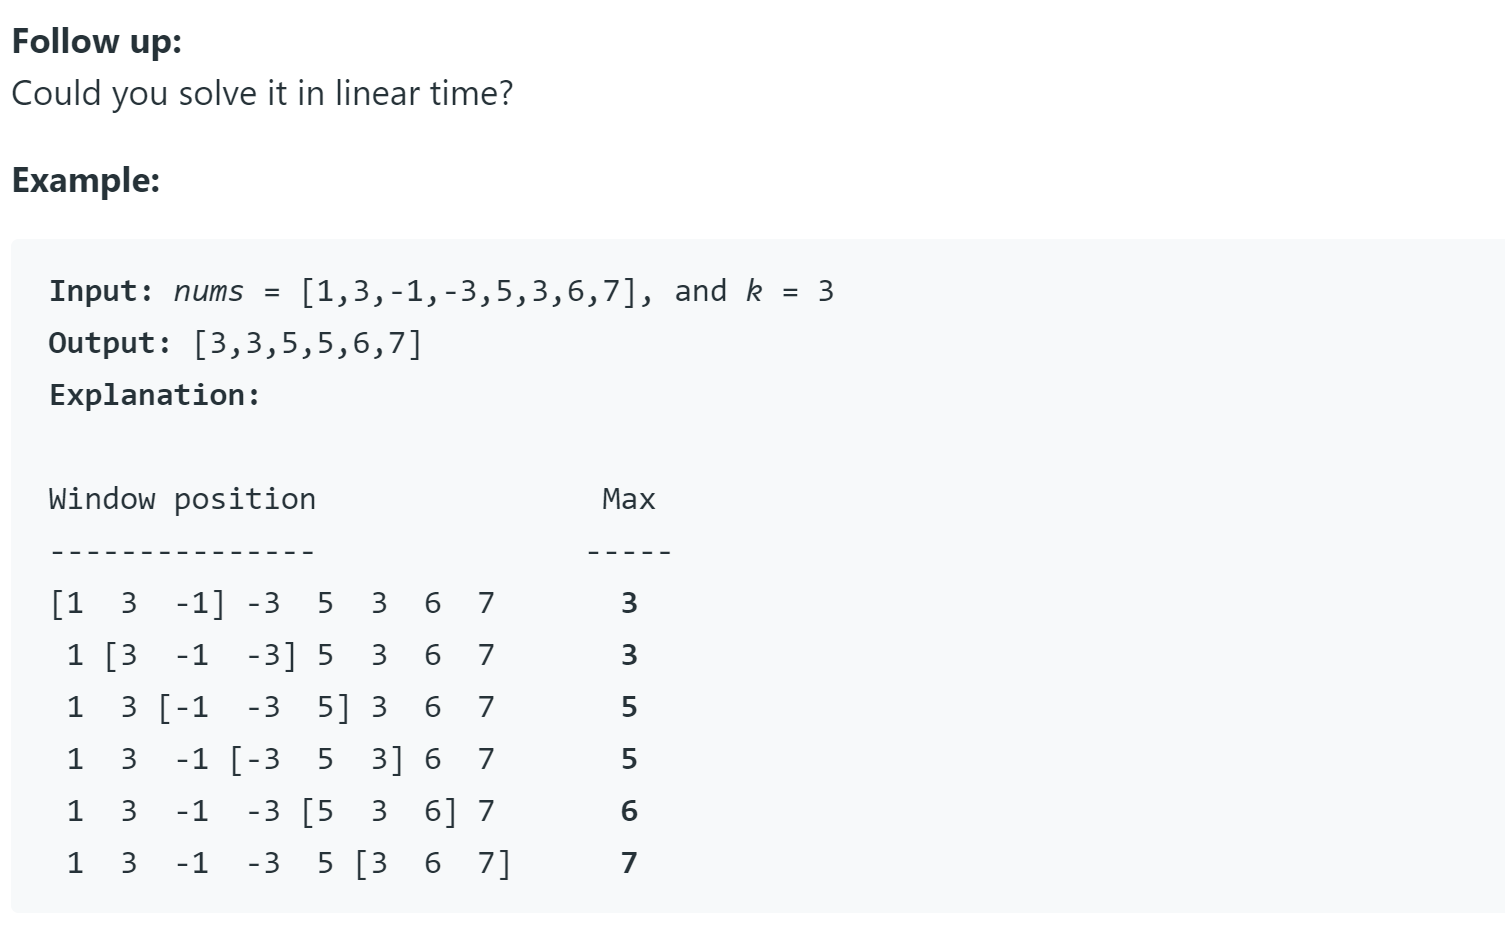

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        if not nums:
            return
        if len(nums) == k:
            heap = nums
            heapq._heapify_max(heap)
            return [heap[0]]

        win_start, win_end = 0, k - 1
        res = []

        heap = nums[win_start:win_end + 1]
        heapq._heapify_max(heap)

        # get the max val
        res.append(heap[0])

        first_in_window = nums[win_start]
        win_start += 1
        win_end += 1
        next_num = nums[win_end]
        n = len(nums)
        # For every remaining element
        while win_end < n:

            # Add the next element of the window to the heap
            heap[heap.index(first_in_window)] = next_num

            # Heapify to get the maximum
            heapq._heapify_max(heap)
            # get the max
            res.append(heap[0])
            first_in_window = nums[win_start]
            win_start += 1
            win_end += 1
            if win_end < n:
                next_num = nums[win_end]
        return res

In [ ]:
from collections import deque


class Solution:
    def maxSlidingWindow(self, nums: 'List[int]', k: 'int') -> 'List[int]':
        # base cases
        n = len(nums)
        if n * k == 0:
            return []
        if k == 1:
            return nums

        def clean_deque(i):
            # remove indexes of elements not from sliding window
            if deq and deq[0] == i - k:
                deq.popleft()

            # remove from deq indexes of all elements
            # which are smaller than current element nums[i]
            while deq and nums[i] > nums[deq[-1]]:
                deq.pop()

        # init deque and output
        deq = deque()
        max_idx = 0
        for i in range(k):
            clean_deque(i)
            deq.append(i)
            # compute max in nums[:k]
            if nums[i] > nums[max_idx]:
                max_idx = i
        output = [nums[max_idx]]

        # build output
        for i in range(k, n):
            clean_deque(i)
            deq.append(i)
            output.append(nums[deq[0]])
        return output

### [Grumpy Bookstore Owner](https://leetcode.com/problems/grumpy-bookstore-owner/)

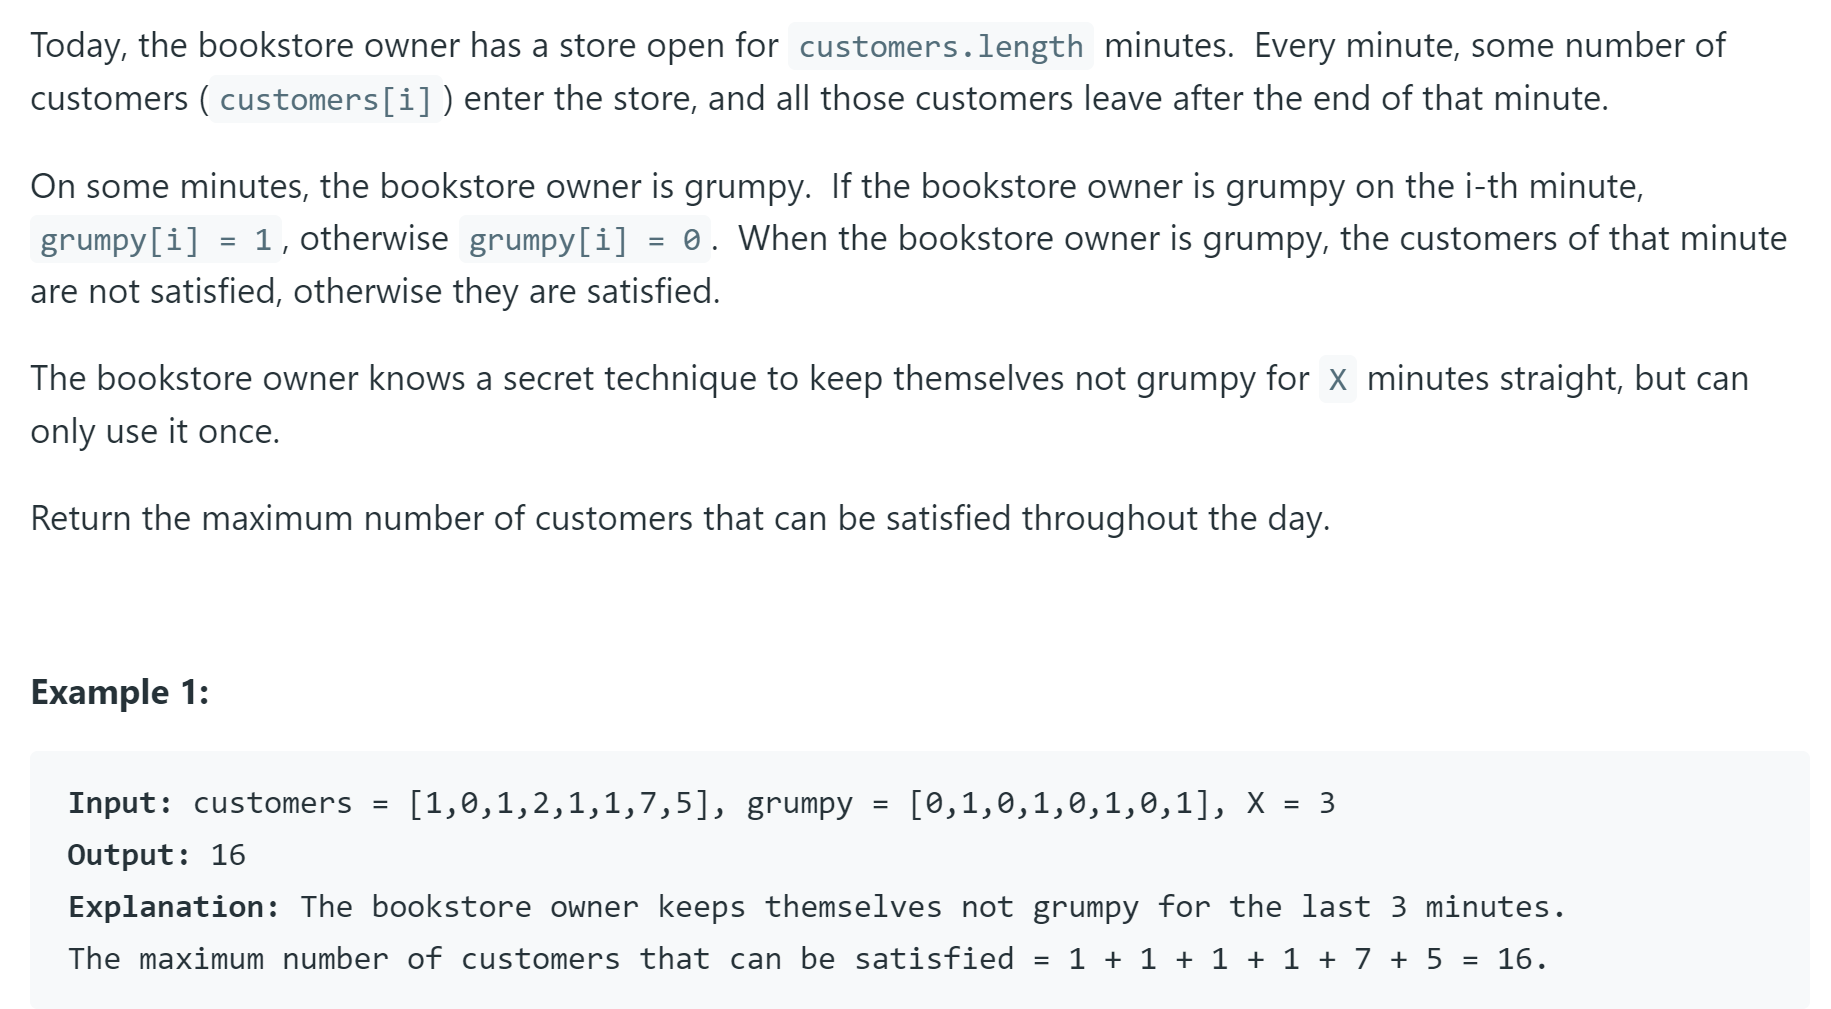

### [Minimum Window Subsequence](https://leetcode.com/problems/minimum-window-subsequence/)

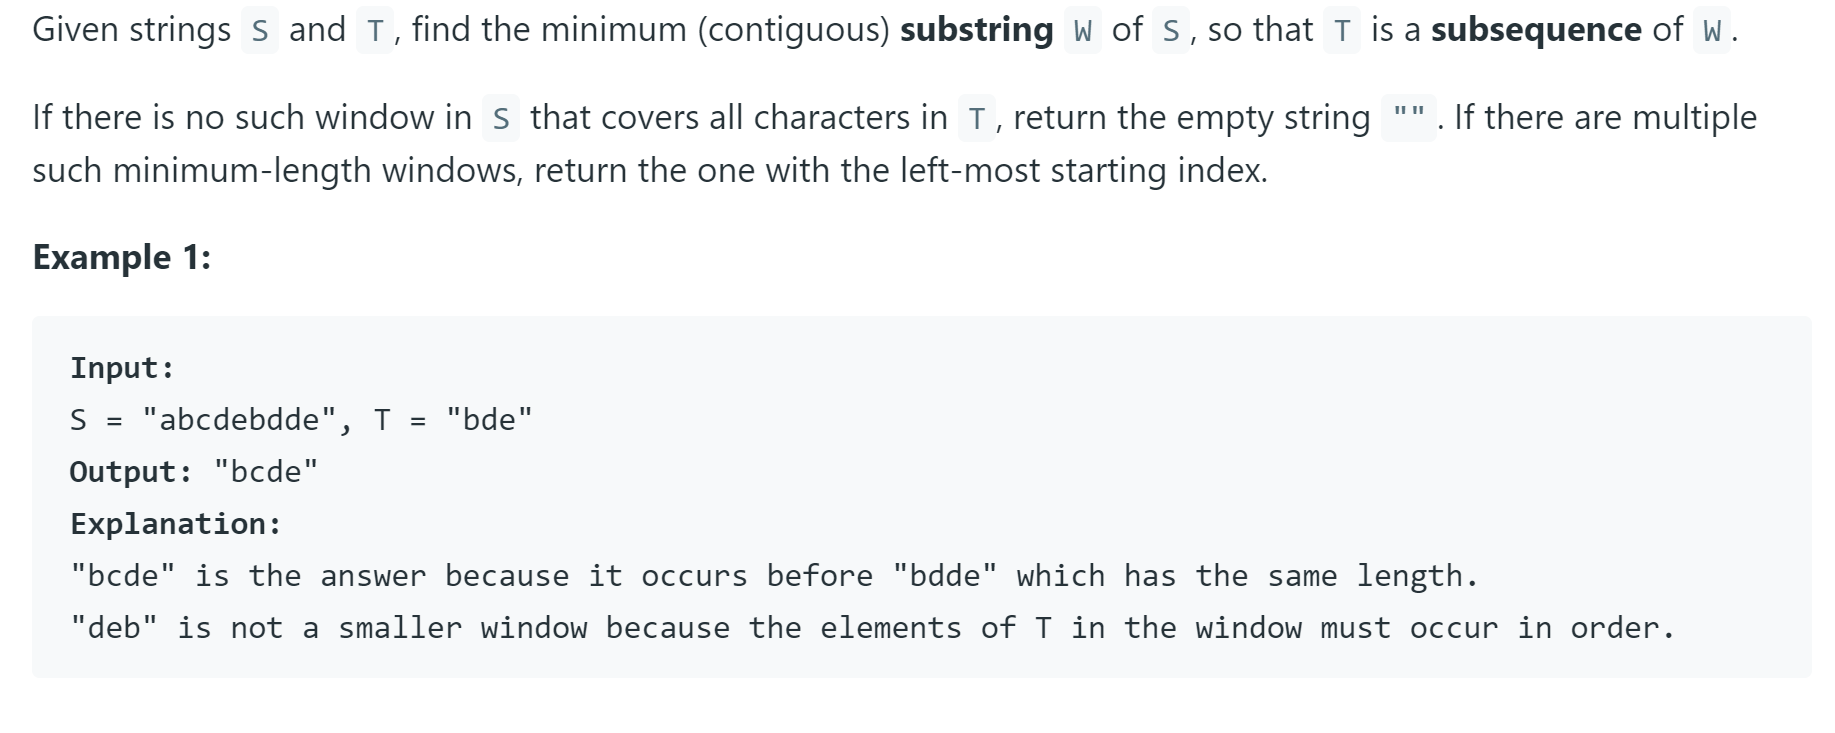

### [Sliding Window Median](https://leetcode.com/problems/sliding-window-median/)

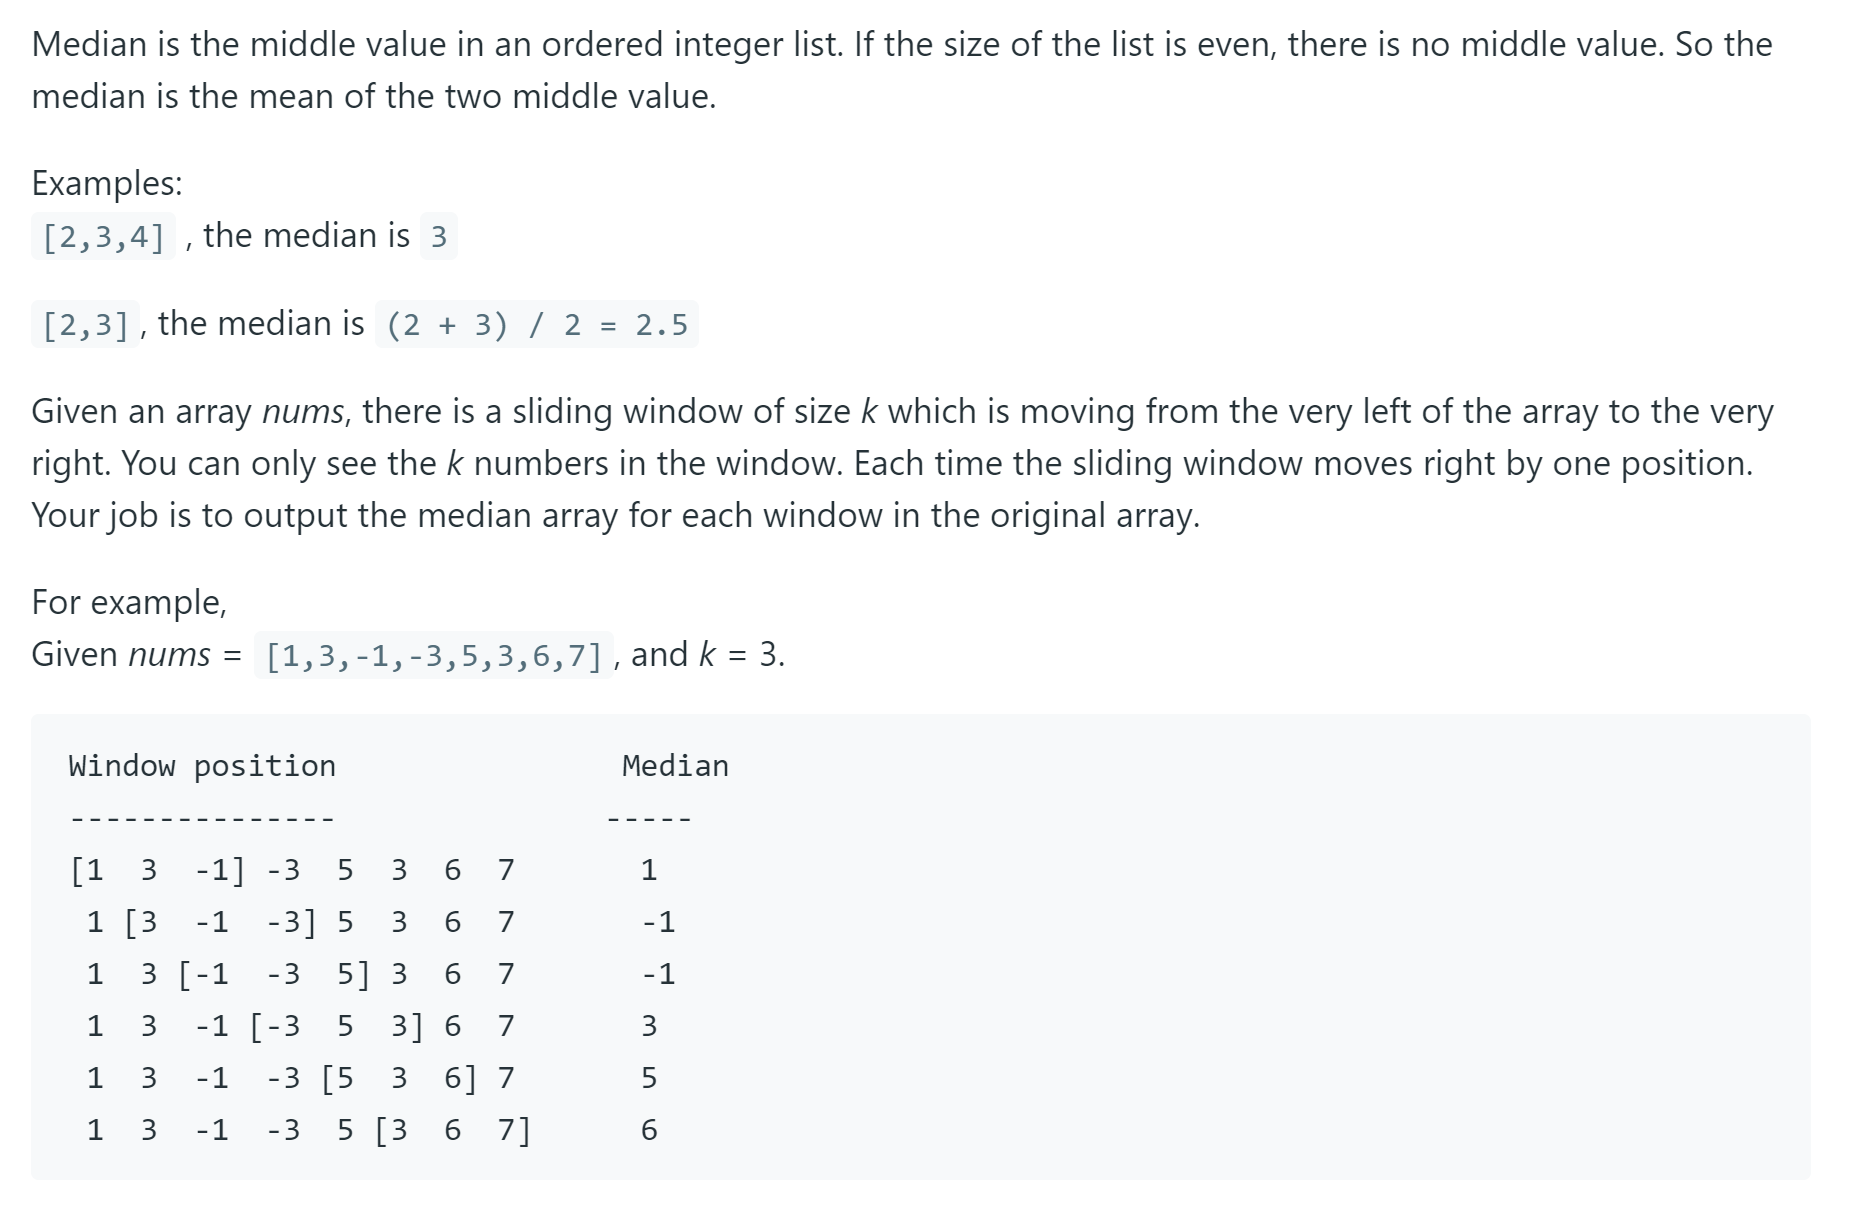

### [Subarrays with K Different Integers](https://leetcode.com/problems/subarrays-with-k-different-integers/)

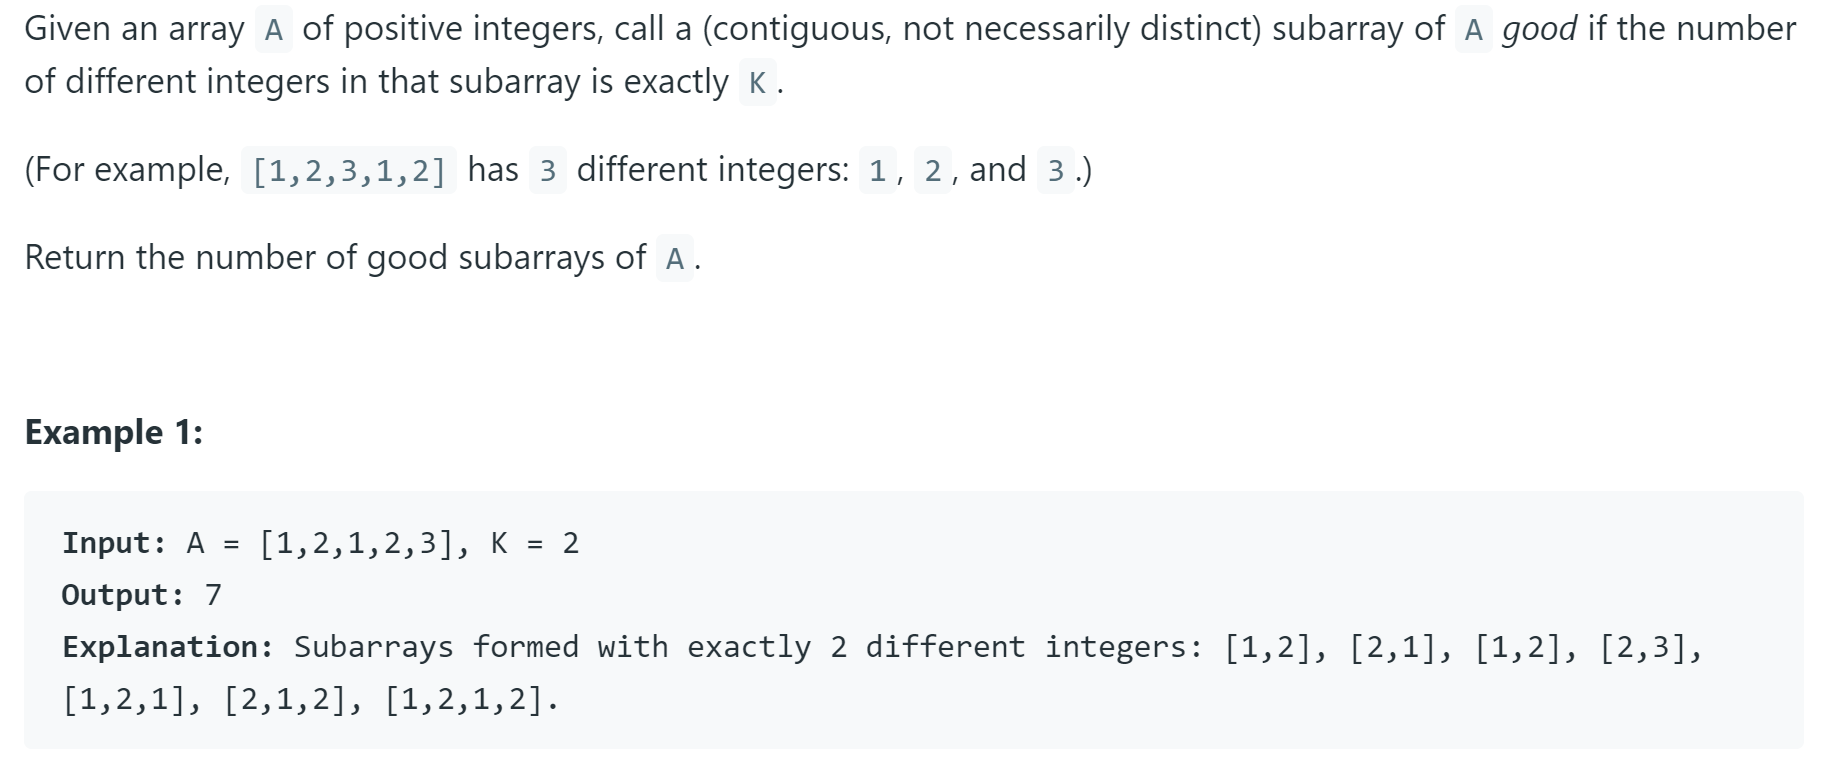

### [Number of Submatrices That Sum to Target](https://leetcode.com/problems/number-of-submatrices-that-sum-to-target/)

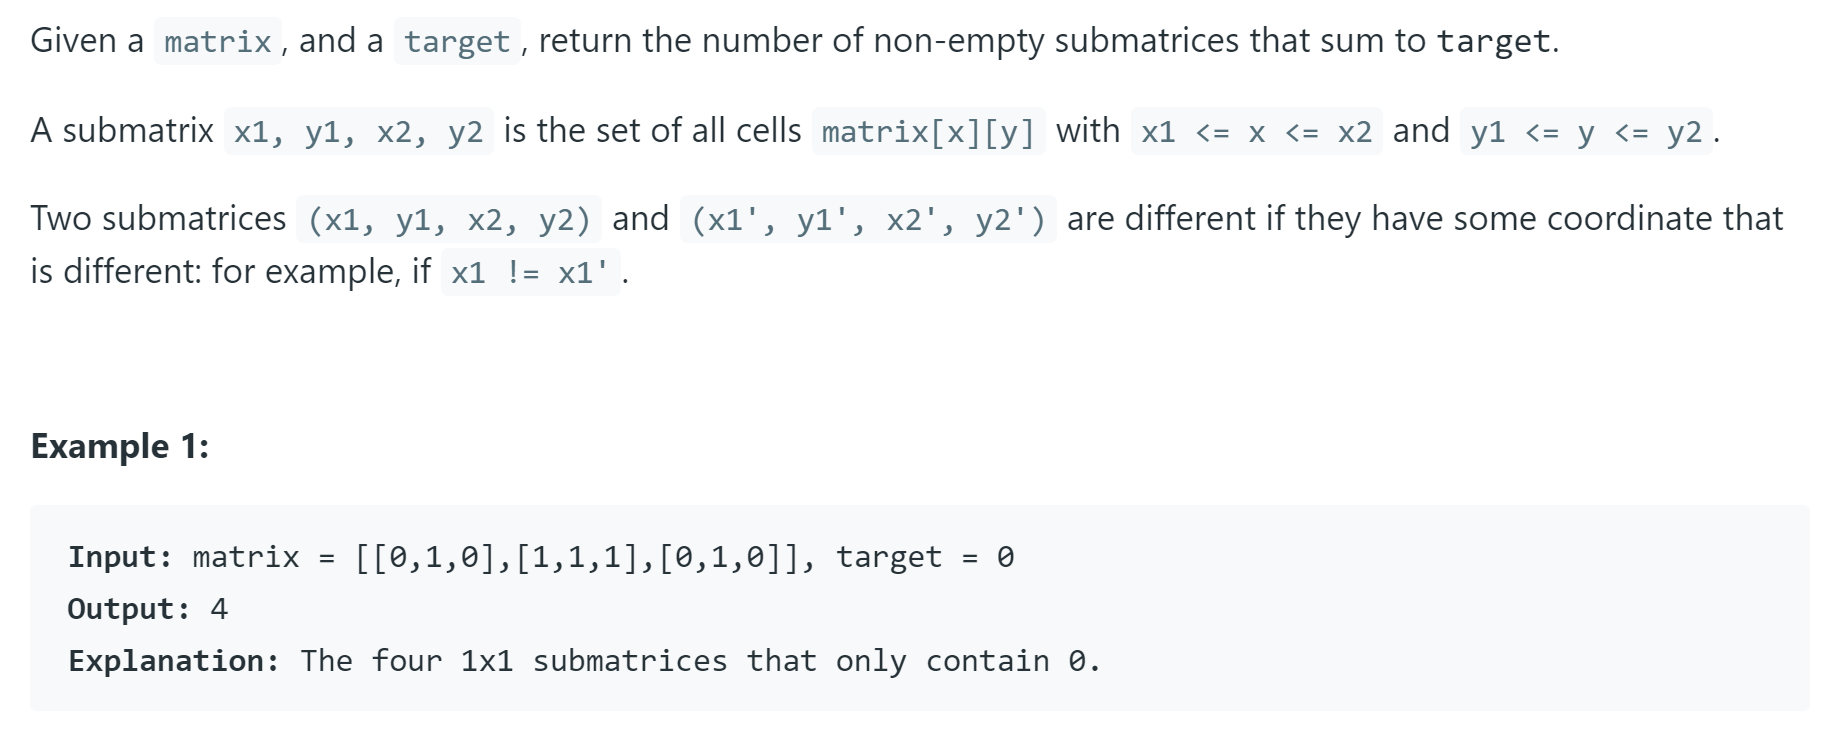

### [Permutation in String](https://leetcode.com/problems/permutation-in-string/)

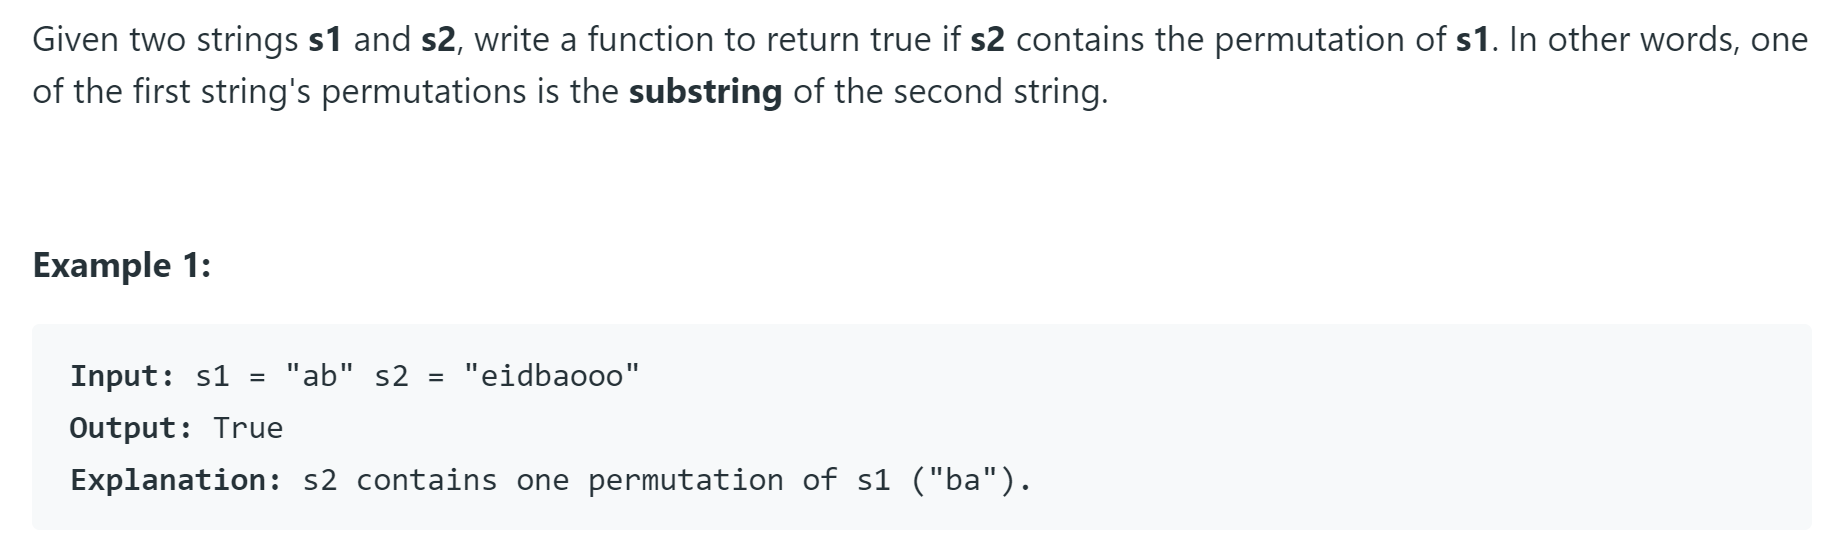

### [Minimum Size Subarray Sum](https://leetcode.com/problems/minimum-size-subarray-sum/)

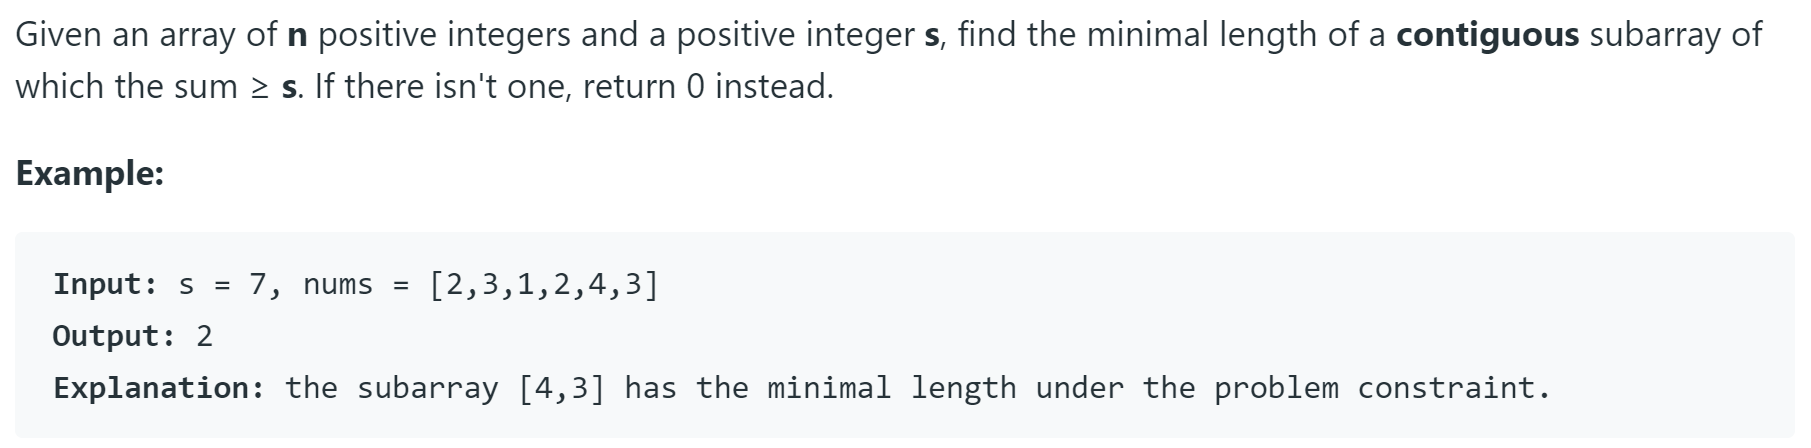

In [ ]:
class Solution:
    def minSubArrayLen(self, s: int, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        start = 0
        arr_sum = 0
        min_size = float('inf')
        for end in range(len(nums)):
            arr_sum += nums[end]

            while arr_sum >= s:
                min_size = min(min_size, (end - start + 1))
                arr_sum -= nums[start]
                start += 1
        return min_size if min_size != float('inf') else 0

### [ Subarray Product Less Than K](https://leetcode.com/problems/subarray-product-less-than-k/)

In [ ]:
from collections import deque
class Solution:
    def numSubarrayProductLessThanK(self, nums: List[int], k: int) -> int:
        # Sliding window
        
        # base case 
        if k<=1: return 0
        
        window_start, count = 0,0
        product = 1
        
        for window_end in range(len(nums)):
            right_num = nums[window_end]
            product *= right_num 
            
        
            while product >= k:
                # remove the left num val from the product
                product /= nums[window_start]
                # Shrink the window
                window_start += 1
                
            # num of pairs satisfying the condition    
            count += window_end - window_start + 1
        
        return count
                